## Introduction to Bayesian Statistics
LSSTC Data Science Fellowship Program Session 16

**Jiayin Dong**, Flatiron Research Fellow

CCA, Flatiron Institute

September 2022

---

In the lecture, we learned Bayesian inference from three examples: (1) Draw balls out of a bag, (2) Observations with Gaussian noise, and (3) Fit a straight line to data. You may find the lecture material in this folder (https://github.com/jiayindong/LSSTC-DSFP-Sessions/tree/main/Sessions/Session16/Day1).

The principle of the Bayesian inference is to update our inference on some parameters of interest $\theta$ out of data $D$ from some prior knowledge on $\theta$.

Bayes' Theorem 

$p(\theta|D) = \cfrac{p(D|\theta)p(\theta)}{p(D)}$,

where $p(\theta|D)$ is the posterior, $p(D|\theta)$ is the likelihood, and $p(\theta)$ is the prior. $p(D)$ is the probablity of observing $D$, i.e., $p(D) = \int{p(D|\theta)p(\theta)d\theta}$.

The approach we used to compute the posterior $p(\theta|D)$ in the lecture is called *grid approximation*.

Grid approximation in five steps,
1. Build a grid for parameters of interest $\theta$. The dimension of the grid depends on the number of parameters.
2. At each parameter value on the grid, calculate the prior $p(\theta_{\rm grid})$.
3. At each parameter value on the grid, calculate the likelihood $p(D|\theta_{\rm grid})$.
4. At each parameter value on the grid, multiply the likelihood by the prior, $p(D|\theta_{\rm grid})p(\theta_{\rm grid})$. Note, this is the unnormalized posterior.
5. Lastly, normalize the posterior by the sum of all values on the grid $\Sigma_{\theta_{\rm grid}} p(D|\theta_{\rm grid})p(\theta_{\rm grid})$.

This problem set is to apply the grid approximation to the three problems we discussed in the lecture.

---

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from matplotlib import rc
#rc('font', **{'family':'sans-serif'})
#rc('text', usetex=True)

### Problem 1: Draw balls out of a bag

We have a bag containing 4 balls. Each ball has two possible colors: black and white. We begin with no information on the number of black and white balls in the bag and want to update our guess on the number of black balls from observations (i.e., drawing balls out of the bag).

####  Problem 1(a) Make one draw

We drew one ball out of the bag. And it is black.

Step 1: Build a grid for $\theta$. Let $\theta$ here be the configurations of black and white balls.

$\theta$ has five possible states: 0, 1, 2, 3, 4 black balls out of 4 balls.

In [4]:
θ = np.arange(5)

θ

array([0, 1, 2, 3, 4])

Step 2: At each state of $\theta$, calculate the prior.

Since we have no previous information about the configuration, we use an uninformation prior.

In [5]:
prior = np.ones(5)/5

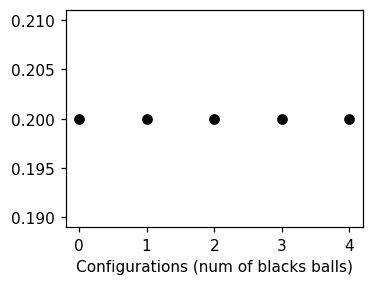

In [6]:
## Plot the prior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.scatter(θ, prior, c='k')
plt.xlabel('Configurations (num of blacks balls)')
#plt.ylabel('$p(\theta)$')
plt.tight_layout()
plt.show()

Step 3: At each state of $\theta$, calculate the likelihood.

At $\theta_0$, which has no black balls, $p( \textrm{"draw a black ball"}|\theta_0) = 0$

At $\theta_1$, which has one black ball and three white balls, $p( \textrm{"draw a black ball"}|\theta_1) = 1/4$

...

At $\theta_4$, which has no white balls, $p( \textrm{"draw a black ball"}|\theta_4) = 1$

In [7]:
likelihood = np.array([0, 1/4, 2/4, 3/4, 1])

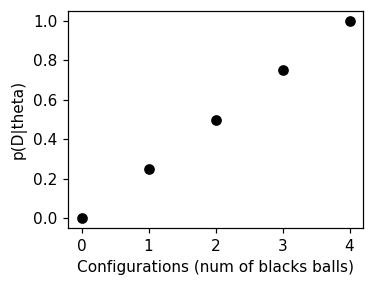

In [8]:
## Plot the likelihood distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.scatter(θ, likelihood, c='k')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'p(D|theta)')
plt.tight_layout()
plt.show()

Step 4: At each state of $\theta$, calculate the unnormalized posterior.

In [9]:
unnormalized_posterior = prior*likelihood

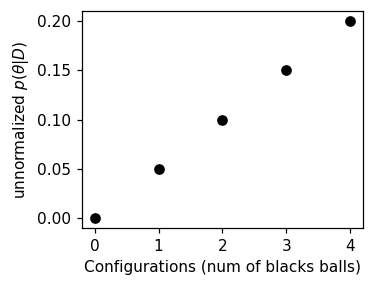

In [10]:
## Plot the unnormalized posterior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.scatter(θ, unnormalized_posterior, c='k')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'unnormalized $p(\theta|D)$')
plt.tight_layout()
plt.show()

Step 5: At each state of $\theta$, normalize the posterior.

In [11]:
posterior = unnormalized_posterior/np.sum(unnormalized_posterior)

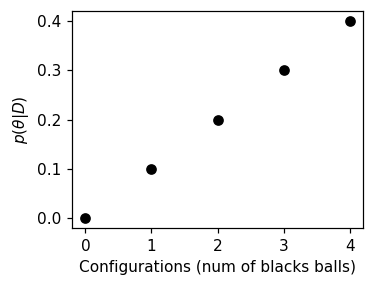

In [12]:
## Plot the posterior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.scatter(θ, posterior, c='k')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'$p(\theta|D)$')
plt.tight_layout()
plt.show()

That's it. We solved the posterior of $\theta$, i.e., an updated guess on the number of black balls after drawing a black ball out of the bag.

####  Problem 1(b) Make another draw

After drawing the black ball, we put it back into the bag. We make another draw to improve our guess on the number of black balls in the bag. And we drew a white ball this time.

Step 1: Build the grid. The grid of $\theta$ remains the same.

Step 2: Calculate the prior. Now we **do** have prior knowledge. Our prior knowledge is from the previous draw. I.e., the posterior we calculated from the previous draw becomes our prior.

In [13]:
prior = np.array([0,0.1,0.2,0.3,0.4]) # Note: This distribution is the same as the posterior in last cell. 

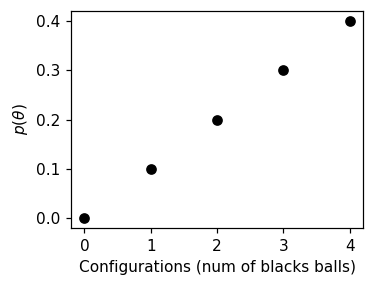

In [14]:
## Plot the prior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.scatter(θ, prior, c='k')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'$p(\theta)$')
plt.tight_layout()
plt.show()

Step 3: Calculate the likelihood. 

At $\theta_0$, which has no black balls, $p( \textrm{"draw a white ball"}|\theta_0) = 1$

At $\theta_1$, which has one black ball and three white balls, $p( \textrm{"draw a white ball"}|\theta_1) = 3/4$

...

At $\theta_4$, which has no white balls, $p( \textrm{"draw a white ball"}|\theta_4) = 0$

In [15]:
likelihood = np.array([1,3/4,1/2,1/4, 0])

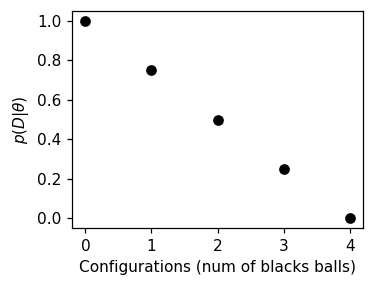

In [16]:
## Plot the likelihood distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.scatter(θ, likelihood, c='k')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'$p(D|\theta)$')
plt.tight_layout()
plt.show()

Step 4: At each state of $\theta$, calculate the unnormalized posterior. 

In [17]:
unnormalized_posterior = prior*likelihood

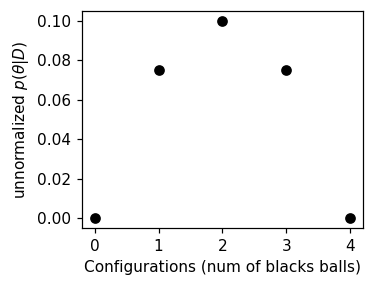

In [18]:
## Plot the unnormalized posterior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.scatter(θ, unnormalized_posterior, c='k')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'unnormalized $p(\theta|D)$')
plt.tight_layout()
plt.show()

Step 5: At each state of $\theta$, normalize the posterior.

In [19]:
posterior = unnormalized_posterior/np.sum(unnormalized_posterior)

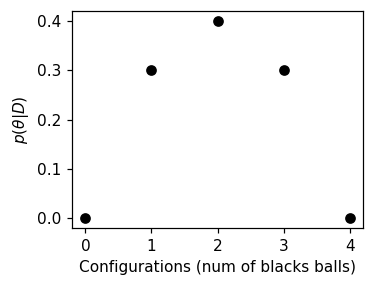

In [20]:
## Plot the posterior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.scatter(θ, posterior, c='k')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'$p(\theta|D)$')
plt.tight_layout()
plt.show()

Again, we get our posterior. Since one draw is black and one draw is white, we get zero probability for $\theta_0$ (no black balls) and $\theta_4$ (all black balls). Our observation prefers an equal number of black and white balls, and that's why the posterior is picked at $\theta_2$ and symmetric around $\theta_2$.

#### Problem 1(c) Add more balls.

Let's say, instead of a bag of four balls, we now have a bag of 100 balls.

We made 10 draws and got 6 black balls and 4 white balls.

We begin with an uninformative prior. What the posterior?

In [22]:
# Step 1: define the theta
θ = np.arange(101)

θ

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [23]:
# Step 2: write the prior
prior = np.ones(101)/101

In [36]:
# Step 3: write the likelihood
likelihood=np.linspace(0,1,101)**6*np.linspace(1,0,101)**4
likelihood

array([0.00000000e+00, 9.60596010e-13, 5.90315622e-11, 6.45378458e-10,
       3.47892351e-09, 1.27266602e-08, 3.64266235e-08, 8.80075709e-08,
       1.87798116e-07, 3.64435458e-07, 6.56100000e-07, 1.11151707e-06,
       1.79068075e-06, 2.76526734e-06, 4.11871763e-06, 5.94597744e-06,
       8.35289535e-06, 1.14552850e-05, 1.53776666e-05, 2.02517091e-05,
       2.62144000e-05, 3.34059736e-05, 4.19676350e-05, 5.20391168e-05,
       6.37561112e-05, 7.72476196e-05, 9.26332639e-05, 1.10020604e-04,
       1.29502506e-04, 1.51154605e-04, 1.75032900e-04, 2.01171533e-04,
       2.29580777e-04, 2.60245273e-04, 2.93122560e-04, 3.28141903e-04,
       3.65203474e-04, 4.04177881e-04, 4.44906077e-04, 4.87199666e-04,
       5.30841600e-04, 5.75587279e-04, 6.21166058e-04, 6.67283147e-04,
       7.13621896e-04, 7.59846453e-04, 8.05604771e-04, 8.50531937e-04,
       8.94253809e-04, 9.36390900e-04, 9.76562500e-04, 1.01439098e-03,
       1.04950621e-03, 1.08155012e-03, 1.11018124e-03, 1.13507927e-03,
      

**Trick** We may instead write our likelihood as a binomial distribution.

Call the SciPy binomial function [stats.binom.pmf(k, n, p)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) where k = 6, n = 10, and p = $\theta$/100.

In [37]:
likelihood_binomial = stats.binom.pmf(6, 10, θ/100)

Do two likelihood distributions look the same?

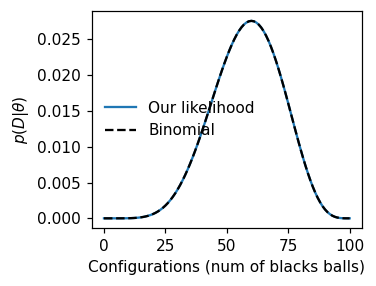

In [38]:
## Compare likelihoood and likelihood_binomial
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.plot(θ, likelihood/np.sum(likelihood),label='Our likelihood')
plt.plot(θ, likelihood_binomial/np.sum(likelihood_binomial), c='k', linestyle='--',label='Binomial')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'$p(D|\theta)$')
plt.legend(framealpha=0)
plt.tight_layout()
plt.show()

In [41]:
# Step 4 & 5: calcualte and normalize the posterior 
posterior= prior*likelihood/np.sum(likelihood)

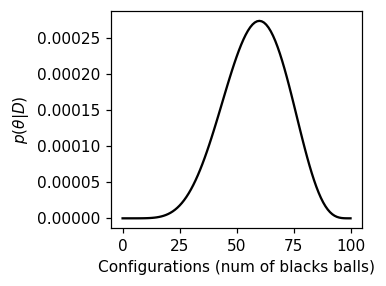

In [42]:
## Plot the posterior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.plot(θ, posterior, c='k')
plt.xlabel('Configurations (num of blacks balls)')
plt.ylabel(r'$p(\theta|D)$')
plt.tight_layout()
plt.show()

### Problem 2: Observations with Gaussian noise

Astronomical observations come with noise. Instead of the *true* value (or mean value) of a parameter of interest is observed, we observe the true value plus some Gaussian noise $\sigma$.

We make observations of a parameter of interest $x$ with some known Gaussian noise $\sigma$. We want to infer $x$ from observations on x.

#### Problem 2(a) Make one observation.

Let's first generate some data.

In [43]:
np.random.seed(42)

xtrue = 1.  # the "true" value of x
σ = 1.  # the uncertainty sigma

xobs = xtrue + np.random.normal(loc=0, scale=σ) # the observed x

print(xobs)

1.4967141530112327


Now we apply the grid approximation method to approximate the posterior of x given the observation, $p(x_{\rm true}|x_{\rm obs})$.

Just a reminder of the grid approximation.
1. Build a grid for parameters of interest $\theta$. The dimension of the grid depends on the number of parameters.
2. At each parameter value on the grid, calculate the prior $p(\theta_{\rm grid})$.
3. At each parameter value on the grid, calculate the likelihood $p(D|\theta_{\rm grid})$.
4. At each parameter value on the grid, multiply the likelihood by the prior, $p(D|\theta_{\rm grid})p(\theta_{\rm grid})$. Note, this is the unnormalized posterior.
5. Lastly, normalize the posterior by the sum of all values on the grid $\Sigma_{\theta_{\rm grid}} p(D|\theta_{\rm grid})p(\theta_{\rm grid})$.

Step 1: Build a grid for xtrue.

In [44]:
## Let xgrid to be evenly spaced from -3 to 3 with 100 samples.
xgrid = np.linspace(-3,3,100)

Step 2: At each value on $x_{\rm grid}$, calculate the prior $p(x_{\rm grid})$.

Let's assume on uniform prior on x.

In [45]:
prior = np.ones_like(xgrid)/100

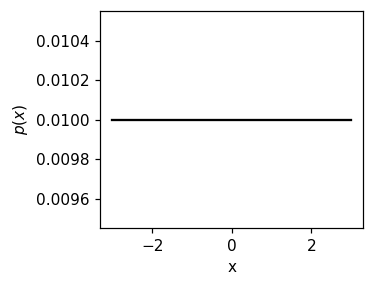

In [46]:
## Plot the prior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.plot(xgrid, prior, c='k')
plt.xlabel(r'x')
plt.ylabel(r'$p(x)$')
plt.tight_layout()
plt.show()

Step 3: At each value on xgrid, calculate the likelihood $p(x_{\rm obs}|x_{\rm grid})$.

For a certain value of $x_{\rm grid,i}$, the likelihood $p(x_{\rm obs}|x_{\rm grid,i})$ is the probablity of observing $x_{\rm obs}$ from a Normal distribution with $\mu = x_{\rm grid,i}$ and $\sigma$.

We use the SciPy function [stats.norm.pdf(x, loc, scale)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=norm#scipy.stats.norm) to calculate the likelihood.

In [47]:
likelihood = stats.norm.pdf(xobs, xgrid, σ)

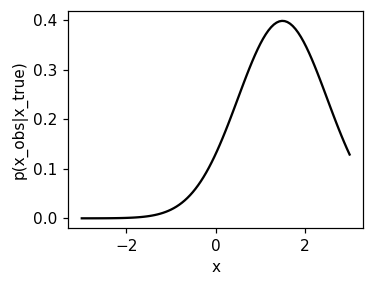

In [49]:
## Plot the likelihood distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.plot(xgrid, likelihood, c='k')
plt.xlabel('x')
plt.ylabel(r'p(x_obs|x_true)')
plt.tight_layout()
plt.show()

Steps 4 & 5: At each value on xgrid, calculate the posterior. And lastly, normalize the posterior.

In [50]:
posterior = prior*likelihood
posterior /= np.sum(posterior)

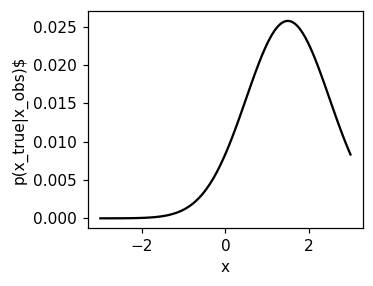

In [52]:
## Plot the posterior distribution
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.plot(xgrid, posterior, c='k')
plt.xlabel('x')
plt.ylabel(r'p(x_true|x_obs)$')
plt.tight_layout()
plt.show()

The posterior has the shape like the likelihood because we used a uniform prior. 

Note that you may find stats.norm.pdf(xgrid, xobs, $\sigma$) and stats.norm.pdf(xobs, xgrid, $\sigma$) have the same mathematical expression. They have different statistical meanings. 
- stats.norm.pdf(xobs, xgrid, $\sigma$) calculates the probability at xobs from Normal distributions N(xgrid, $\sigma$).

- stats.norm.pdf(xgrid, xobs, $\sigma$) calculates the probabilities at xgrid from a Normal distribution N(xobs, $\sigma$). 

#### Problem 2(b) Informative prior.

Assume that we have some prior knowledge of x. Assume our prior is distribution as Normal(0.8, 0.5), i.e., $p(x) \sim \mathcal{N}(0.8, 0.5)$. 

Redo the analysis.

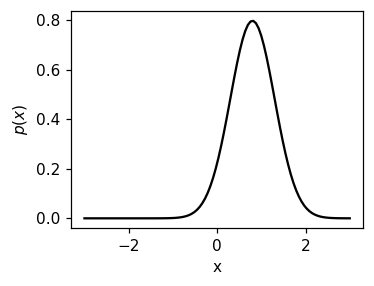

In [57]:
# YOUR_CODE_HERE
prior = stats.norm.pdf(xgrid,0.8,0.5)
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.plot(xgrid, prior, c='k')
plt.xlabel(r'x')
plt.ylabel(r'$p(x)$')
plt.tight_layout()
plt.show()

Let's ponder that for a moment. How did the posterior change and why it changed?

#### Problem 2(c):  Many observations.

Let's keep the assumption the same but now make 10 observations on x.

Generate some data.

In [58]:
xobs = xtrue + np.random.normal(0,σ,size=10)
print(xobs)

[ 0.53427025  1.24196227 -0.91328024 -0.72491783  0.43771247 -0.01283112
  1.31424733  0.09197592 -0.4123037   2.46564877]


Step 1: The xgrid remains the same.

Step 2: Prior. Let's keep using the normal prior from the previous question.

Step 3: Likelihood. Since now we have 10 observations, we need to calculate the likelihood for each observation and multiply them all together.

In [59]:
likelihood = np.ones_like(xgrid)

for i, xobs_i in enumerate(xobs):
    likelihood *= stats.norm.pdf(xobs_i, xgrid, σ)
    
print(likelihood[:10])

[5.71842914e-32 4.41369545e-31 3.28379423e-30 2.35503552e-29
 1.62804700e-28 1.08488666e-27 6.96866769e-27 4.31482406e-26
 2.57527957e-25 1.48160906e-24]


You may find the likelihood values are getting much smaller when we have more observations. It will be troublesome as they reach the smallest representable number in double (or single) precision.

Instead, we could use log_likelihood, which is the natural log (ln) of the likelihood.

Redo the likelihood calculation above with log_likelihood.

In [60]:
log_likelihood = np.zeros_like(xgrid)

for i, xobs_i in enumerate(xobs):
    log_likelihood += np.log(stats.norm.pdf(xobs_i, xgrid, σ))# YOUR_CODE_HERE
    
print(log_likelihood[:10])

[-71.93902883 -69.89542557 -67.88855326 -65.91841189 -63.98500146
 -62.08832199 -60.22837345 -58.40515587 -56.61866923 -54.86891353]


Steps 4 & 5: Calculate the posterior and normalize it.

In [61]:
log_posterior = np.log(prior) + log_likelihood
posterior = np.exp(log_posterior)
posterior /= np.sum(posterior)

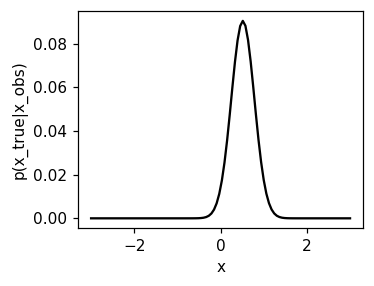

In [64]:
plt.figure(figsize=(3.5,2.7),dpi=110)
plt.plot(xgrid, posterior, c='k')
plt.xlabel('x')
plt.ylabel(r'p(x_true|x_obs)')
plt.tight_layout()
plt.show()

### Problem 3: Fit a straight line to data

Lastly, let's apply the grid approximation method to model a straight line.

We have two parameters of interest, the slope of the line $m$ and the intercept of the line $b$. The line model is described as $y = mx + b$.

We made 10 observations of y but with some Gaussian noise $\sigma$. Assume that we know the exact x values.

Let's generate some data.

In [65]:
x = np.linspace(-1,1,10)

m_true = 1.
b_true = 0.5
y_true = m_true*x + b_true

σ = 0.2

y_obs = y_true + np.random.normal(size=len(y_true))*σ

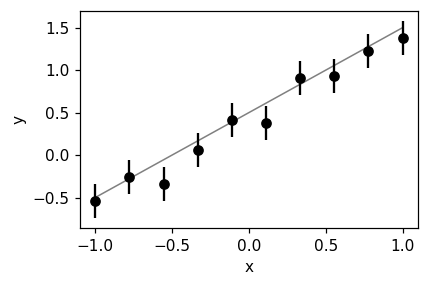

In [66]:
plt.figure(figsize=(4,2.7),dpi=110)
plt.errorbar(x, y_obs, yerr=σ, linestyle='', fmt='o', c='k')
plt.plot(x, y_true, c='grey', lw=1, zorder=0)
plt.ylabel('y')
plt.xlabel('x')
plt.tight_layout()
plt.show()

Let's do the grid approximation to infer the slope and the intercept ${m, b}$.

1. Build a grid for parameters of interest $\theta$. The dimension of the grid depends on the number of parameters.
2. At each parameter value on the grid, calculate the prior $p(\theta_{\rm grid})$.
3. At each parameter value on the grid, calculate the likelihood $p(D|\theta_{\rm grid})$.
4. At each parameter value on the grid, multiply the likelihood by the prior, $p(D|\theta_{\rm grid})p(\theta_{\rm grid})$. Note, this is the unnormalized posterior.
5. Lastly, normalize the posterior by the sum of all values on the grid $\Sigma_{\theta_{\rm grid}} p(D|\theta_{\rm grid})p(\theta_{\rm grid})$.

Step 1: Build the grid. We use [np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to broadcast the vectors.

In [67]:
mgrid = np.linspace(0,2,200)
bgrid = np.linspace(0,1,100)
mv, bv = np.meshgrid(mgrid, bgrid)

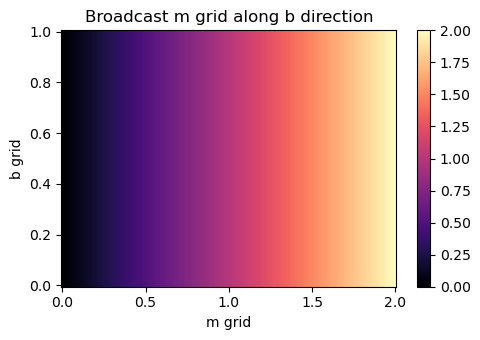

In [71]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,mv,cmap='magma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('Broadcast m grid along b direction')
plt.tight_layout()
plt.show()

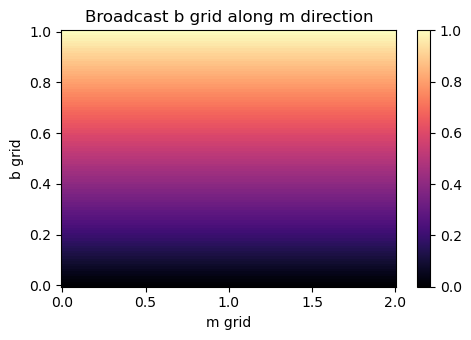

In [72]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,bv,cmap='magma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('Broadcast b grid along m direction')
plt.tight_layout()
plt.show()

Step 2: At each grid value $(m_i, b_j)$, calcuate the prior.

Let's assume uniform priors on $m$ and $b$. Note that because of the geometry of the problem, a uniform prior on $m$ is biased towards high slopes.

$ m \sim {\rm Uniform}(0, 2)$

$ b \sim {\rm Uniform}(0, 1)$

In [78]:
prior_m = np.ones_like(mgrid)/200
prior_b = np.ones_like(bgrid)/200

prior_mv, prior_bv = np.meshgrid(prior_m, prior_b)

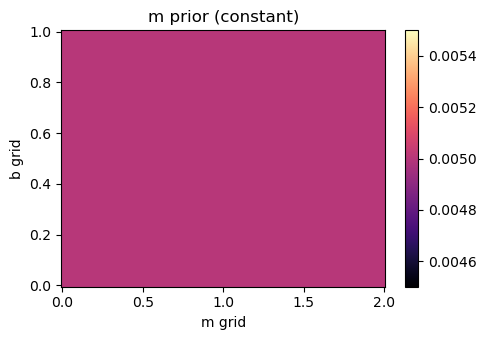

In [82]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,prior_mv,cmap='magma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('m prior (constant)')
plt.tight_layout()
plt.show()

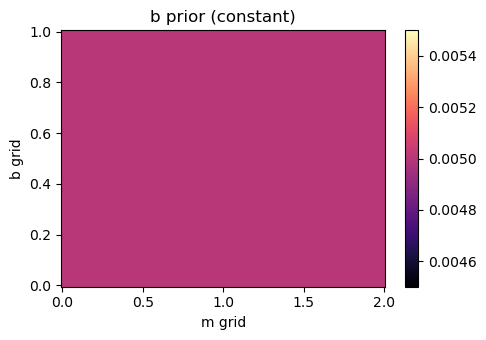

In [83]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,prior_bv,cmap='magma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('b prior (constant)')
plt.tight_layout()
plt.show()

Our prior here should now be the product $p(m)p(b)$ or the sum $\log(m)+\log(b)$ if we take the natural log.

In [84]:
log_prior = np.log(prior_mv)+np.log(prior_bv)

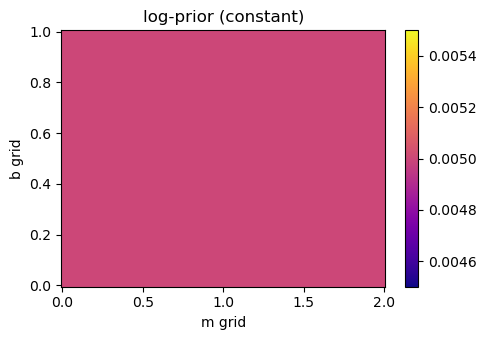

In [85]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,prior_bv,cmap='plasma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('log-prior (constant)')
plt.tight_layout()
plt.show()

Step 3: At each grid value $(m_i, b_j)$, calcuate the log-likelihood.

In [93]:
log_likelihood = 0.

for i, this_y_obs in enumerate(y_obs):
    
    this_y_true = mv*x[i] + bv
    
    log_likelihood += stats.norm.logpdf(this_y_obs, this_y_true, σ)

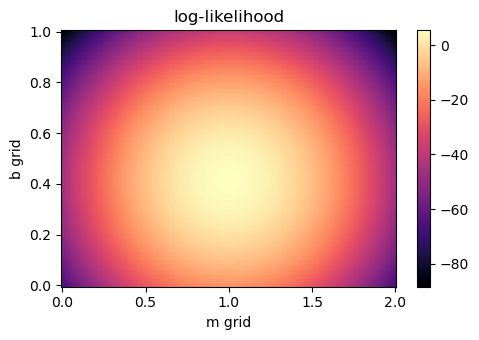

In [94]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,log_likelihood,cmap='magma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('log-likelihood')
plt.tight_layout()
plt.show()

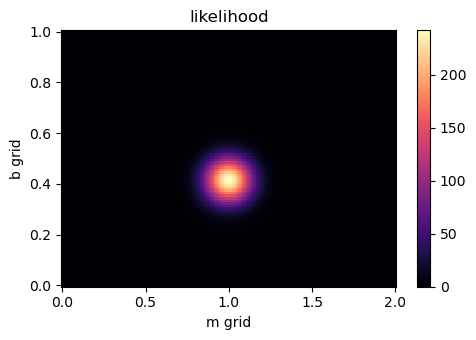

In [95]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,np.exp(log_likelihood),cmap='magma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('likelihood')
plt.tight_layout()
plt.show()

Step 4 & 5: At each grid value $(m_i, b_j)$, calcuate the posterior and normalize it.

In [99]:
log_posterior = log_likelihood+log_prior

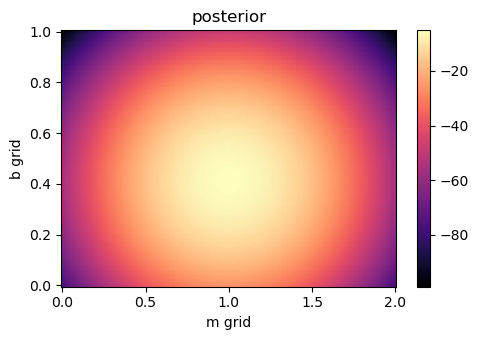

In [103]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,log_posterior,cmap='magma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('posterior')
plt.tight_layout()
plt.show()

In [104]:
posterior = np.exp(log_posterior)
posterior /= np.sum(posterior)

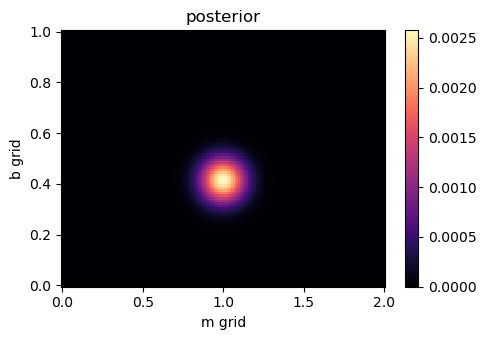

In [105]:
plt.figure(figsize=(5,3.5))
plt.pcolormesh(mgrid,bgrid,posterior,cmap='magma')
plt.xlabel('m grid')
plt.ylabel('b grid')
plt.colorbar()
plt.title('posterior')
plt.tight_layout()
plt.show()

**Bonus Problem** Try different priors on $m$ and $b$. How does the posterior change?